In [1]:
import pandas as pd
import geopandas
import mapclassify
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import nuts
import settings
import plotting
from plotting import COLWIDTH, TEXTWIDTH
import eust

In [2]:
nuts_table = nuts.get_nuts_candidates()
EU28_countries = list(nuts_table.country_code.unique())

In [3]:
refareas = ['UAA', 'UAA_XJ2000_J3000']

In [4]:
subnational_quantities = {
    refarea: pd.read_csv(f'outdata/{refarea}/subnational_quantities.csv', index_col='geo')
    for refarea in refareas
}

subnational_rates = {
    refarea: pd.read_csv(f'outdata/{refarea}/subnational_rates.csv', index_col='geo')
    for refarea in refareas
}

national_quantities = {
    refarea: pd.read_csv(f'outdata/{refarea}/national_quantities.csv', index_col='geo')
    for refarea in refareas
}

national_rates = {
    refarea: pd.read_csv(f'outdata/{refarea}/national_rates.csv', index_col='geo')
    for refarea in refareas
}

# Prepare for plotting

In [5]:
nuts_geo = geopandas.read_file(settings.NUTS_GIS_PATH).set_index('NUTS_ID')

def plot_variable_choropleth(s, ax=None, **kwargs):
    key = s.name
    
    d = nuts_geo[['geometry']].join(s, how='inner')
    
    kwargs_final = {
        'legend_kws': {
            'loc': 'upper left',
            'bbox_to_anchor': (1.05, 1.1),
            'borderaxespad': 0,
            'frameon': False,
            'title': 'kg P / ha',
        },
        **plotting.CHOROPLETH_KWS[key],
        **kwargs,
    }
    
    ax = plotting.plot_europe_choropleth(d, key, ax=ax, **kwargs_final)
    return ax

# Plot budget terms

/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


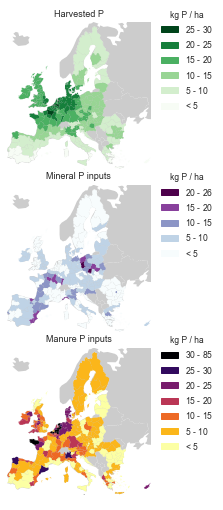

In [6]:
fig, axs = plt.subplots(nrows=3, figsize=(COLWIDTH, COLWIDTH * 2.3))

subplots = [
    dict(
        title='Harvested P',
        variable='harvest',
    ),
    dict(
        title='Mineral P inputs',
        variable='mineral',  
    ),
    dict(
        title='Manure P inputs',
        variable='excretion',
    )
]

for ax, sp in zip(axs, subplots):
    variable = sp['variable']
    plot_variable_choropleth(        
        subnational_rates['UAA'][variable].rename(variable),
        ax=ax,
    )
    ax.set_title(sp['title'])
    
plotting.adjust_print_plot(fig, right=0.7)
fig.savefig('outdata/figures/Fig1.pdf')

# Plot surplus with both reference areas

/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is t

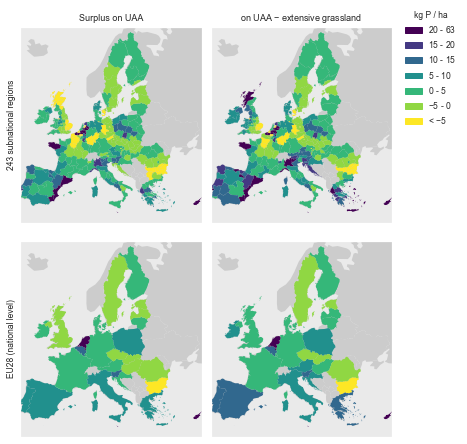

In [7]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(TEXTWIDTH, COLWIDTH * 2))

subplots = [
    dict(
        title='Surplus on UAA',
        dataset=subnational_rates['UAA']['surplus'],
        legend=False,
        ylabel=f"{len(subnational_rates['UAA'])} subnational regions",
    ),
    dict(
        title='on UAA $-$ extensive grassland',
        dataset=subnational_rates['UAA_XJ2000_J3000']['surplus'],
        legend=True,   
        ylabel=None,
    ),
    dict(
        title=None,
        dataset=national_rates['UAA']['surplus'],
        legend=False,
        ylabel='EU28 (national level)',
    ),
    dict(
        title=None,
        dataset=national_rates['UAA_XJ2000_J3000']['surplus'],
        legend=False,
        ylabel=None,
    )
]

for ax, sp in zip(axs.flat, subplots):
    plot_variable_choropleth(
        sp['dataset'],
        legend=sp['legend'],
        ax=ax,
    )
    ax.set_title(sp['title'])
    ax.set_ylabel(sp['ylabel'])
    ax.axis('on')
    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    
plotting.adjust_print_plot(fig, right=0.85, left=0.03)
fig.savefig('outdata/figures/Fig2.pdf')

/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


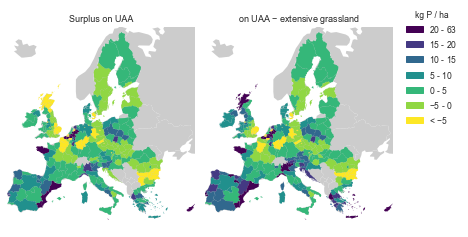

In [8]:
fig, axs = plt.subplots(ncols=2, figsize=(TEXTWIDTH, COLWIDTH * 1.1))

subplots = [
    dict(
        title='Surplus on UAA',
        variant='UAA',
        legend=False,
    ),
    dict(
        title='on UAA $-$ extensive grassland',
        variant='UAA_XJ2000_J3000',
        legend=True,        
    )    
]

for ax, sp in zip(axs, subplots):
    plot_variable_choropleth(
        subnational_rates[sp['variant']].surplus,
        legend=sp['legend'],
        ax=ax,
    )
    ax.set_title(sp['title'])
    
plotting.adjust_print_plot(fig, right=0.85)
fig.savefig('outdata/figures/Fig2b.pdf')

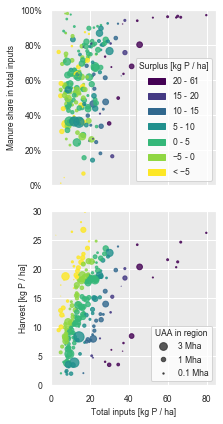

In [9]:
surplus_scheme = mapclassify.UserDefined(
    subnational_rates['UAA'].surplus,
    plotting.CHOROPLETH_KWS['surplus']['bin_uls'],
)
surplus_cmap = plotting.CHOROPLETH_KWS['surplus']['cmap']
surplus_fmt = plotting.CHOROPLETH_KWS['surplus']['legend_fmt']

binned_surplus = (
    pd.Series(
        data=surplus_scheme.yb,
        index=subnational_rates['UAA'].surplus.index,
    )
    .rename('binned_surplus')
)
marker = 'o'
area_scale = 20
alpha = 0.8

scatter_data = (
    subnational_rates['UAA']
    .join(binned_surplus)
    .assign(
        UAA=subnational_rates['UAA'].refarea.mul(area_scale),
        input_sum=lambda d: d.mineral + d.excretion,
        frac_manure=lambda d: d.excretion / d.input_sum
    )
)
scatter_data = scatter_data.sample(len(scatter_data), replace=False) # shuffle randomly

fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(COLWIDTH, COLWIDTH * 2))

frac_ax, harvest_ax = axs

axs[1].set_xlabel('Total inputs [kg P / ha]')


harvest_ax.scatter(
    x='input_sum',
    y='harvest',
    c='binned_surplus',
    s='UAA',
    cmap=surplus_cmap,
    data=scatter_data,
    marker=marker,
    alpha=alpha,
)

harvest_ax.set_ylabel('Harvest [kg P / ha]')
harvest_ax.set_ylim(0, 30)

for ax in axs:
    ax.set_xlim(0, 85)


frac_ax.scatter(
    x='input_sum',
    y='frac_manure',    
    c='binned_surplus',
    s='UAA',
    cmap=surplus_cmap,
    data=scatter_data,
    marker=marker,
    alpha=alpha,
)

frac_ax.set_ylabel('Manure share in total inputs')
frac_ax.yaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
frac_ax.set_ylim(0, 1)

frac_ax.legend(
    handles=plotting.make_legend_handles(surplus_scheme, surplus_cmap, fmt=surplus_fmt),
    title='Surplus [kg P / ha]',
    facecolor='#ffffff',
    framealpha=0.8,
    bbox_to_anchor=(1, 0),
    loc='lower right',
)

reference_areas = [0.1, 1, 3]
size_patches = [
    mpl.lines.Line2D(
        markersize=(area * area_scale)**0.5,
        lw=0,
        marker=marker,
        xdata=[],
        ydata=[],
        color='#303030',
        alpha=alpha,
        label=f'{area:,g} Mha',
    )
    for area in reference_areas
]

harvest_ax.legend(
    handles=size_patches[::-1],
    facecolor='#ffffff',
    framealpha=0.8,
    bbox_to_anchor=(1, 0),
    loc='lower right',
    title="UAA in region",
)


plotting.adjust_print_plot(fig, left=0.21, right=0.975, bottom=0.1, hspace=0.15)

fig.savefig('outdata/figures/Fig3.pdf')

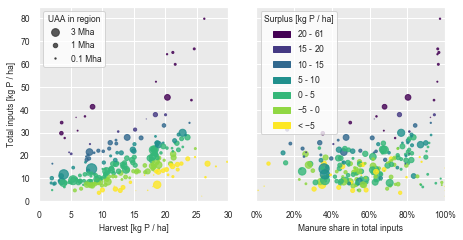

In [10]:
surplus_scheme = mapclassify.UserDefined(
    subnational_rates['UAA'].surplus,
    plotting.CHOROPLETH_KWS['surplus']['bin_uls'],
)
surplus_cmap = plotting.CHOROPLETH_KWS['surplus']['cmap']
surplus_fmt = plotting.CHOROPLETH_KWS['surplus']['legend_fmt']

binned_surplus = (
    pd.Series(
        data=surplus_scheme.yb,
        index=subnational_rates['UAA'].surplus.index,
    )
    .rename('binned_surplus')
)
marker = 'o'
area_scale = 20
alpha = 0.8

scatter_data = (
    subnational_rates['UAA']
    .join(binned_surplus)
    .assign(
        UAA=subnational_rates['UAA'].refarea.mul(area_scale),
        input_sum=lambda d: d.mineral + d.excretion,
        frac_manure=lambda d: d.excretion / d.input_sum
    )
)
scatter_data = scatter_data.sample(len(scatter_data), replace=False) # shuffle randomly

fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(TEXTWIDTH, COLWIDTH * 1.1))

harvest_ax, frac_ax = axs

axs[0].set_ylabel('Total inputs [kg P / ha]')


harvest_ax.scatter(
    x='harvest',
    y='input_sum',
    c='binned_surplus',
    s='UAA',
    cmap=surplus_cmap,
    data=scatter_data,
    marker=marker,
    alpha=alpha,
)

harvest_ax.set_xlabel('Harvest [kg P / ha]')
harvest_ax.set_xlim(0, 30)

for ax in axs:
    ax.set_ylim(0, 85)


frac_ax.scatter(
    x='frac_manure',
    y='input_sum',
    c='binned_surplus',
    s='UAA',
    cmap=surplus_cmap,
    data=scatter_data,
    marker=marker,
    alpha=alpha,
)

frac_ax.set_xlabel('Manure share in total inputs')
frac_ax.xaxis.set_major_formatter(mpl.ticker.PercentFormatter(xmax=1))
frac_ax.set_xlim(0, 1)

frac_ax.legend(
    handles=plotting.make_legend_handles(surplus_scheme, surplus_cmap, fmt=surplus_fmt),
    title='Surplus [kg P / ha]',
    facecolor='#ffffff',
    framealpha=0.8,
    bbox_to_anchor=(0, 1),
    loc='upper left',
)

reference_areas = [0.1, 1, 3]
size_patches = [
    mpl.lines.Line2D(
        markersize=(area * area_scale)**0.5,
        lw=0,
        marker=marker,
        xdata=[],
        ydata=[],
        color='#303030',
        alpha=alpha,
        label=f'{area:,g} Mha',
    )
    for area in reference_areas
]

harvest_ax.legend(
    handles=size_patches[::-1],
    facecolor='#ffffff',
    framealpha=0.8,
    bbox_to_anchor=(0, 1),
    loc='upper left',
    title="UAA in region",
)


plotting.adjust_print_plot(fig, left=0.08, right=0.975, bottom=0.15, wspace=0.15)

fig.savefig('outdata/figures/Fig3b.pdf')

# Compare to van Dijk et al (2016) and to Eurostat's budgets

In [11]:
# From Fig. 4 in van Dijk et al. (2016) Sci. Tot. Env. 542 pp. 1078-1093
vanDijk_surplus = (
    pd.Series(
        {
            'BE': 23.2,
            'NL': 21.9,
            'PT': 13.2,
            'DK': 10.1,
            'ES': 9.0,
            'IT': 7.5,
            'PL': 7.4,
            'FI': 7.4,
            'IE': 6.7,
            'LU': 6.1,
            'EL': 5.9,
            'UK': 4.2,
            'FR': 3.8,
            'DE': 1.8,
            'LT': 0.8,
            'SE': 0.5,
            'BG': -0.1,
            'AT': -0.1,
            'SI': -0.4,
            'LV': -0.9,
            'HU': -1.0,
            'EE': -1.1,
            'CZ': -2.1,
            'SK': -2.8,
        }
    )
    .rename('van Dijk et al.')
    .rename_axis('geo')
)

In [12]:
eurostat_gnb = (
    eust
    .read_table_data('aei_pr_gnb')
    .value
    .xs(settings.DATA_YEAR, level='time')
    .xs('P', level='nutrient')
    .unstack('indic_ag')
)

eurostat_surplus = (
    eurostat_gnb
    .eval('BAL / UAA')
    .rename('Eurostat')
)

In [13]:
def abbr_country(d, key='country'):
    return d.replace({key: {'United Kingdom': 'UK', 'Czech Republic': 'Czech Rep.'}})

national_comparison_data = (
    eurostat_surplus.to_frame()
    .join(national_rates['UAA'].surplus.rename('Whole UAA'), how='inner')
    .join(national_rates['UAA_XJ2000_J3000'].surplus.rename('Excl. extensive grass'), how='inner')
    .join(vanDijk_surplus)
    .rename_axis('source', axis=1)
    .assign()
    .stack()
    .rename('surplus')
    .reset_index()
    .join(nuts_table['country'], on='geo')
    .pipe(abbr_country)
    .set_index(['source', 'geo'])
    .sort_values('surplus')
    .reindex(
        [
            'Whole UAA',
            'Excl. extensive grass',
            'Eurostat',
            'van Dijk et al.',
        ],
        level='source'
    )
    .reset_index()
)

national_comparison_data

,source,geo,surplus,country
0,Whole UAA,BG,-5.846813,Bulgaria
1,Whole UAA,CZ,-3.307770,Czech Rep.
2,Whole UAA,UK,-2.316271,UK
3,Whole UAA,SK,-1.803474,Slovakia
4,Whole UAA,EE,-1.746558,Estonia
...,...,...,...,...
103,van Dijk et al.,ES,9.000000,Spain
104,van Dijk et al.,DK,10.100000,Denmark
105,van Dijk et al.,PT,13.200000,Portugal
106,van Dijk et al.,NL,21.900000,Netherlands


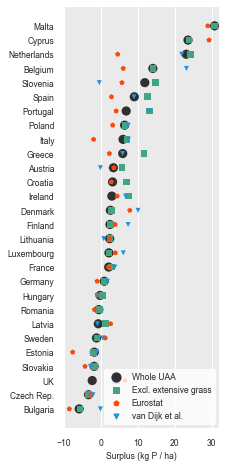

In [14]:
fig, ax = plt.subplots(figsize=(COLWIDTH, COLWIDTH * 2.2))

# Plot the national average surpluses
sns.scatterplot(
    x='surplus',
    y='country',
    hue='source',
    style='source',
    size='source',
    data=national_comparison_data,
    ax=ax,
    palette={
        'Whole UAA': '#303030',
        'Excl. extensive grass': sns.set_hls_values('#66c2a5', l=0.45),
        'Eurostat': sns.set_hls_values('#fc8d62', l=0.5),
        'van Dijk et al.': sns.set_hls_values('#1f78b4', l=0.5),
    },
    sizes={
        'Whole UAA': 85,
        'Excl. extensive grass': 45,
        'Eurostat': 30,
        'van Dijk et al.': 25,
    },
    markers={
        'Whole UAA': 'o',
        'Excl. extensive grass': 's',
        'Eurostat': 'p',
        'van Dijk et al.': 'v',
    },
    linewidth=0,
)

ax.set_ylabel(None)
ax.set_xlabel('Surplus (kg P / ha)')
ax.grid(True, axis='x')
ax.grid(False, axis='y')
ax.set_xlim(-10, 32)

# Hack to remove seaborn's legend title which is added as a legend entry
h, l = ax.get_legend_handles_labels()
ax.legend(h[1:], l[1:], loc='lower right')
legend = ax.get_legend()
legend.get_frame().set_color('#ffffff')
legend.get_frame().set_alpha(0.8)

plotting.adjust_print_plot(fig, left=0.27, bottom=0.1, right=0.99, top=0.99)

fig.savefig('outdata/figures/Fig4.pdf')

# List some areas with large surpluses or deficits

In [15]:
substantial_area = subnational_rates['UAA'].refarea > 0.1
surplus_subset = (
    subnational_rates['UAA']
    .loc[substantial_area]
)

In [16]:
surplus_subset.loc[lambda s: s.surplus > 20]

,harvest,excretion,mineral,surplus,refarea
geo,,,,,
BE23,24.190343,41.650083,2.604353,20.064093,0.14870
BE25,24.636394,64.071951,2.604350,42.039906,0.20349
CY00,4.048851,20.348884,7.326443,23.626476,0.10933
ES51,8.478083,28.093337,13.263737,32.878991,1.12527
ES52,3.527306,10.482396,19.298256,26.253346,0.63775
ES62,3.570721,17.124302,17.301852,30.855433,0.37586
FR52,20.373696,36.529371,8.933026,25.088701,1.64367
NL21,21.612141,57.754529,2.156362,38.298750,0.19873
NL22,21.235773,62.955181,2.156358,43.875765,0.23244


In [17]:
surplus_subset.loc[lambda s: s.surplus < -5]

,harvest,excretion,mineral,surplus,refarea
geo,,,,,
BG31,12.106931,1.641431,3.723615,-6.741886,0.93677
BG32,13.320375,2.651998,3.422150,-7.246227,0.79343
BG33,12.878195,2.411817,2.313562,-8.152816,0.82223
BG34,10.040889,2.878531,2.072739,-5.089620,0.84516
BG41,9.488734,2.836870,0.886282,-5.765581,0.55447
CZ04,14.494831,4.185240,4.139814,-6.169777,0.31235
DE7,20.242765,9.402669,4.499171,-6.340925,0.77189
DEB,19.686758,7.039546,6.364600,-6.282612,0.70695
DEE,21.184284,6.991675,8.338812,-5.853797,1.17278


In [18]:
deficit_but_high_inputs = (
    subnational_rates['UAA']
    .loc[lambda d: d.surplus < 0]
    .loc[lambda d: (d.excretion + d.mineral) > 15]
)
deficit_but_high_inputs

,harvest,excretion,mineral,surplus,refarea
geo,,,,,
BE24,24.762645,16.743099,2.604349,-5.415197,0.08517
BE31,28.080357,9.474991,5.779955,-12.825410,0.05948
BE32,24.808114,17.277849,5.779973,-1.750292,0.20318
DE8,21.355594,7.025918,12.131105,-2.198571,1.34096
DED,18.674542,9.459665,7.851616,-1.363262,0.90663
DEE,21.184284,6.991675,8.338812,-5.853797,1.17278
DEG,20.847153,8.206681,8.243635,-4.396837,0.78067
DK01,21.043431,11.708221,5.192530,-4.142680,0.09848
FR10,22.594332,1.064298,15.435534,-6.094500,0.57164


In [19]:
deficit_but_high_inputs.refarea.sum()

18.065459999999998

# List France example

In [20]:
(
    subnational_rates['UAA']
    .loc['FR':'FRX']
    .round(1)
    .join(nuts_table)
    .sort_values('surplus')
    .dropna()
)

,harvest,excretion,mineral,surplus,refarea,country_code,nuts_level,label,parent_geo,country
geo,,,,,,,,,,
FR22,26.7,5.9,10.6,-10.3,1.3,FR,2,Picardie,FR2,France
FR10,22.6,1.1,15.4,-6.1,0.6,FR,2,Île de France,FR1,France
FR30,23.6,13.3,5.3,-5.0,0.8,FR,2,Nord - Pas-de-Calais,FR3,France
FR24,19.0,4.4,11.5,-3.1,2.3,FR,2,Centre,FR2,France
FR26,18.0,9.6,5.9,-2.5,1.7,FR,2,Bourgogne,FR2,France
FR43,16.8,12.5,3.2,-1.1,0.7,FR,2,Franche-Comté,FR4,France
FR21,21.3,5.4,15.3,-0.6,1.5,FR,2,Champagne-Ardenne,FR2,France
FR62,13.8,8.7,5.1,0.0,2.5,FR,2,Midi-Pyrénées,FR6,France
FR23,22.1,11.0,11.5,0.4,0.8,FR,2,Haute-Normandie,FR2,France


# Compare reference areas to Eurostat

In [21]:
(
    eurostat_gnb
    .UAA
    .rename('GNB_UAA')
    .div(1e3)
    .to_frame()
    .join(national_quantities['UAA'].refarea.rename('UAA'))
    .assign(percent_difference=lambda d: (d.GNB_UAA / d.UAA - 1) * 100)
    .round(1)
)

,GNB_UAA,UAA,percent_difference
geo,,,
AT,2.9,2.7,5.0
BE,1.3,1.3,2.4
BG,5.0,4.7,7.4
CH,1.5,NaN,NaN
CY,0.1,0.1,-2.1
CZ,3.5,3.5,0.8
DE,16.7,16.7,-0.1
DK,2.6,2.6,0.3
EE,0.9,1.0,-1.0


# Regions with surplus heavily affected by reference area choice

In [22]:
surplus_diff = (
    subnational_rates['UAA_XJ2000_J3000'].surplus
    - subnational_rates['UAA'].surplus
).rename('diff')
(
    surplus_diff
    .loc[lambda s: s.abs() > 10]
)

geo
AT32    10.704553
AT33    13.522050
EL21    31.009340
EL41    15.516715
EL42    24.694704
EL43    20.746254
ES13    12.080288
ES23    11.199773
ES70    14.533925
HR03    16.256057
ITC2    12.073418
ITH1    15.387327
ITH2    37.710055
UKD1    10.921867
UKM2    10.970121
UKM3    12.148815
UKM6    38.991329
Name: diff, dtype: float64

In [23]:
(
    surplus_diff
    .loc[lambda s: s.abs() > 5]
    .pipe(len)
)

41

/home/rasmus/.local/share/virtualenvs/code-a3t2G2j4/lib/python3.6/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


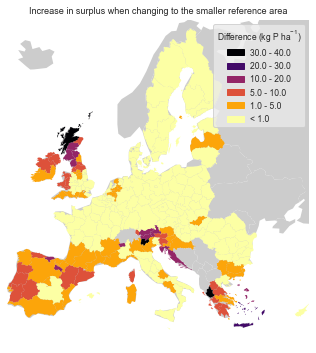

In [24]:
fig, ax = plt.subplots(figsize=(6, 6))
(
    nuts_geo[['geometry']]
    .join(surplus_diff, how='inner')
    .pipe(
        plotting.plot_europe_choropleth,
        'diff',
        bin_uls=[1, 5, 10, 20, 30, 40,],
        cmap=mpl.cm.inferno_r,
        ax=ax,
    )
)
ax.get_legend().set_title('Difference (kg P ha$^{-1}$)')
ax.set_title('Increase in surplus when changing to the smaller reference area')
fig.savefig('outdata/figures/reference-area-surplus-change.pdf', bbox_inches='tight')

# Why is Eurostat's surplus for Italy so much lower than ours?

Let's inspect data for Spain and France for comparison.

The most striking difference is that Italy's P harvest in fruit averages 9 kg P/ha UAA. Since fruit (including citrus) covers only 4% of Italy's UAA, this would correspond to a fruit P yield of > 200 kg P / ha. This is probably an error and the main cause that our balances are so different.

In [25]:
# Calculate major outputs per ha UAA (national average)
(
    eurostat_gnb
    .loc[['IT', 'ES', 'FR']]
    .pipe(lambda d: d.div(d.UAA, axis=0))
    .T
    .loc[lambda s: s.index.str.startswith('O_')]
    .join(eust.read_table_metadata('aei_pr_gnb')['dimensions'].loc['indic_ag'])
    .set_index('label')
    .round(2)
)

,IT,ES,FR
label,,,
Nutrient removal by crop residues burned on the field (tonnes of nutrient),NaN,0.61,0.00
Nutrient removal by harvest of crops (tonnes of nutrient),15.32,5.84,8.75
Nutrient removal by harvest of cereals (tonnes of nutrient),4.99,3.57,6.74
Nutrient removal by harvest of fruits (tonnes of nutrient),8.93,1.42,0.14
Nutrient removal by harvest of industrial crops (tonnes of nutrient),0.55,0.35,1.26
Nutrient removal by harvest of ornamental crops (tonnes of nutrient),NaN,0.03,0.00
Nutrient removal by harvest of other crops (tonnes of nutrient),NaN,0.00,0.00
Nutrient removal by harvest of dried pulses (tonnes of nutrient),0.04,0.11,0.11
Nutrient removal by harvest of root crops (tonnes of nutrient),0.16,0.05,0.38


In [26]:
areas = (
    eust.read_table_data('ef_lus_allcrops')
    .value
    .xs('HA', level='unit')
    .xs('TOTAL', level='agrarea')
    .xs('IT', level='geo')
    .xs(2013, level='time')
    .rename('Area')
    .to_frame()
    .join(eust.read_table_metadata('ef_lus_allcrops')['dimensions'].loc['crops'], on='crops')
    .assign(**{'Area share': lambda d: d.Area / d.Area.loc['UAA']})
    .reset_index()
    .set_index(['crops', 'label'])
    .loc[['UAA', 'ARA', 'PECR', 'J0000', 'F0000', 'T0000']]
)
areas

,,Area,Area share
crops,label,,
ARA,Arable land,6728360.0,0.556114
F0000,"Fruits, berries and nuts (excluding citrus fruits, grapes and strawberries)",377470.0,0.031199
J0000,Permanent grassland,3316430.0,0.274110
PECR,Permanent crops,2032310.0,0.167975
T0000,Citrus fruits,120180.0,0.009933
UAA,Utilised Agricultural Area,12098890.0,1.000000
